## Using Recurrent Neural Nets for Text classification

### We will use RNNs and Backpropagation technique for understanding the comments given by Wine tasters for a particular wine, and then say whether that comment was Positive or Negative. Thus, its a text classifier. Encoding of text will be done. RNNs help the network learn and understand the essence of the review.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf

In [2]:
wine = pd.read_csv('wine-reviews.csv', usecols=['country','description','points','price','province','variety','winery'])

In [3]:
wine.head()

,country,description,points,price,province,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Pinot Noir,Sweet Cheeks


In [4]:
wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   variety      129970 non-null  object 
 6   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.9+ MB


In [6]:
np.size(wine.country.unique())

44

In [7]:
wine.isna().sum()

country          63
description       0
points            0
price          8996
province         63
variety           1
winery            0
dtype: int64

In [8]:
wine=wine.dropna(subset=['country','description','province','variety'])

In [9]:
wine.isna().sum()

country           0
description       0
points            0
price          8992
province          0
variety           0
winery            0
dtype: int64

In [10]:
wine=wine.fillna(value=wine.price.mean())

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129907 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129907 non-null  object 
 1   description  129907 non-null  object 
 2   points       129907 non-null  int64  
 3   price        129907 non-null  float64
 4   province     129907 non-null  object 
 5   variety      129907 non-null  object 
 6   winery       129907 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.9+ MB


In [12]:
wine.head()

,country,description,points,price,province,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.368796,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Pinot Noir,Sweet Cheeks


### We have completed the Data Loading and Data cleaning part of our analysis

### Lets draw some good plots and understand our data a bit more closely

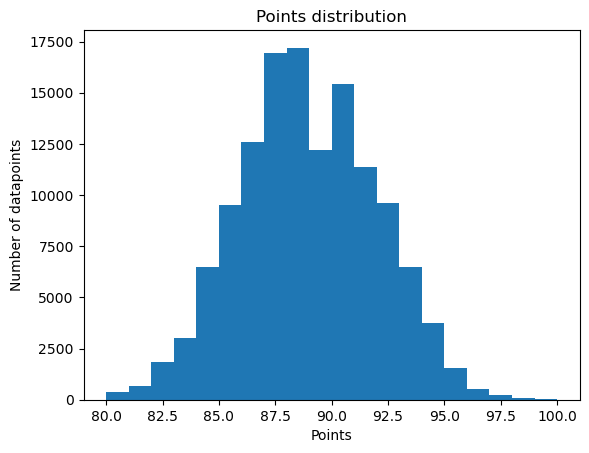

In [13]:
plt.hist(wine.points, bins=20)
plt.title("Points distribution")
plt.xlabel("Points")
plt.ylabel("Number of datapoints")
plt.show()

In [14]:
wine.points.mean()

88.44705058233967

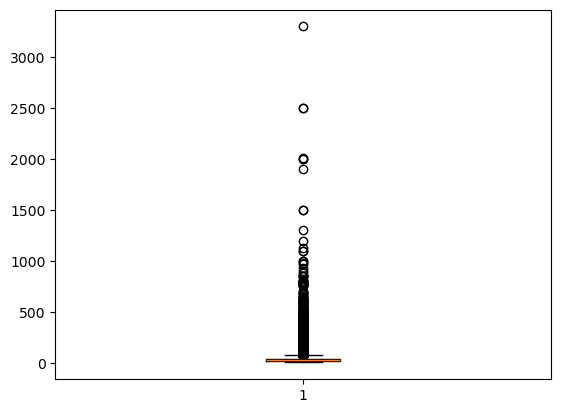

In [15]:
plt.boxplot(wine.price)
plt.show()

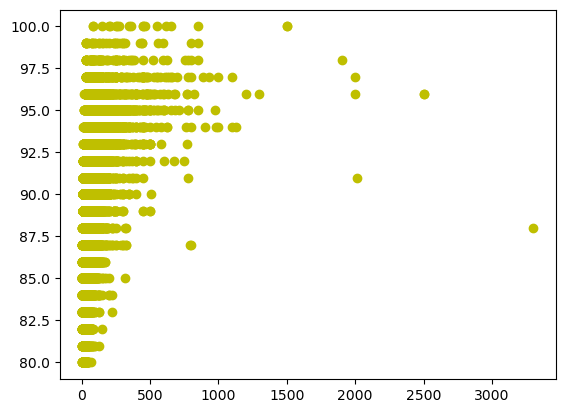

In [16]:
plt.scatter(wine.price, wine.points, color='y')
plt.show()

In [17]:
wine.describe()

,points,price
count,129907.000000,129907.000000
mean,88.447051,35.368796
std,3.040078,39.585650
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,28.000000
75%,91.000000,40.000000
max,100.000000,3300.000000


In [18]:
import seaborn as sb

<Axes: xlabel='price', ylabel='points'>

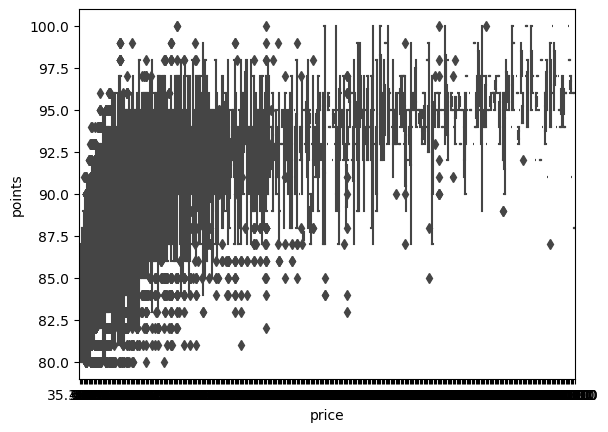

In [19]:
sb.boxplot(data=wine, x=wine.price,y=wine.points)